# Exploratory Data Analysis (EDA) for clustering 

In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [90]:
# Load the Excel file
file_path = 'DATA/OSA_DB_class.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows of the dataframe
df.head()

,Gender,Weight,Age,Height,Cervical,BMI,OSA
0,1,82.000000,39.0,168.000000,40.617735,29.053288,Severe
1,1,87.797037,46.0,171.399408,43.000000,29.885548,Severe
2,1,109.000000,32.0,190.000000,42.000000,30.193906,Healthy
3,1,86.000000,39.0,169.000000,42.000000,30.110991,Severe
4,1,145.000000,47.0,172.000000,44.000000,49.012980,Severe


### Clustering: unsupervised so remove outcome variable OSA


In [91]:
df_clus = df.drop(columns=['OSA', 'Gender'])
df_clus.head()

,Weight,Age,Height,Cervical,BMI
0,82.000000,39.0,168.000000,40.617735,29.053288
1,87.797037,46.0,171.399408,43.000000,29.885548
2,109.000000,32.0,190.000000,42.000000,30.193906
3,86.000000,39.0,169.000000,42.000000,30.110991
4,145.000000,47.0,172.000000,44.000000,49.012980


### Standardization before performing PCA or t-SNE

In [92]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
df_clus_scaled = scaler.fit_transform(df_clus)

# Print the mean and standard deviation of the normalized data
print("Mean of normalized data:", df_clus_scaled.mean(axis=0))
print("Standard deviation of normalized data:", df_clus_scaled.std(axis=0))

Mean of normalized data: [-1.06581410e-16  2.60532336e-16  1.56911521e-15  9.59232693e-16
  4.67773968e-16]
Standard deviation of normalized data: [1. 1. 1. 1. 1.]


## Perform Principal Component Analysis (PCA)

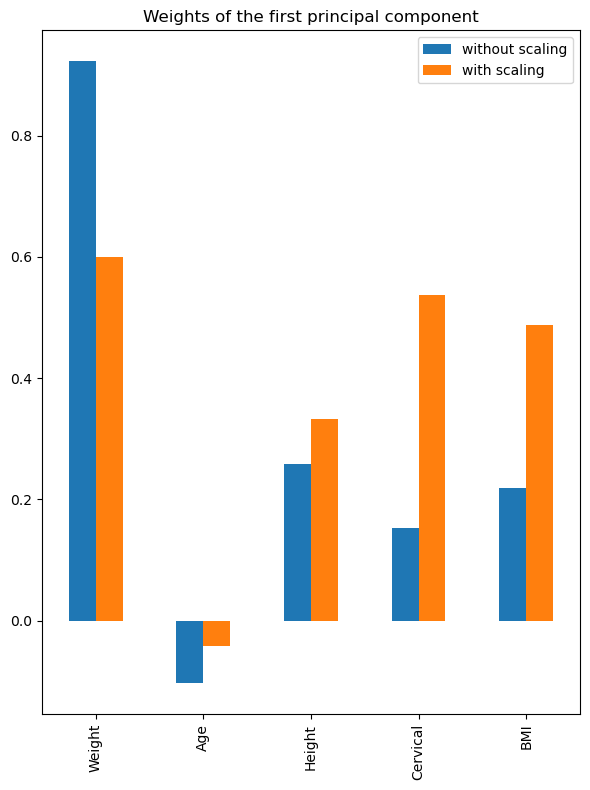

In [93]:
import pandas as pd
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

# Assuming df_clus is the dataframe with the features to be used
X_train = df_clus.values
scaled_X_train = df_clus_scaled

# Perform PCA without scaling
pca = PCA(n_components=5).fit(X_train)
X_train_transformed = pca.transform(X_train)

# Perform PCA with scaling
scaled_pca = PCA(n_components=5).fit(scaled_X_train)
X_train_std_transformed = scaled_pca.transform(scaled_X_train)

# Create a DataFrame to compare the first principal component
first_pca_component = pd.DataFrame(
    pca.components_[0], index=df_clus.columns, columns=["without scaling"]
)
first_pca_component["with scaling"] = scaled_pca.components_[0]

# Plot the weights of the first principal component
first_pca_component.plot.bar(
    title="Weights of the first principal component", figsize=(6, 8)
)

plt.tight_layout()
plt.show()

In [94]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=5)  # You can change the number of components
principal_components = pca.fit_transform(df_clus_scaled)

# Create a DataFrame with the principal components
df_pca = pd.DataFrame(data=principal_components)
df_pca.head()



,0,1,2,3,4
0,-0.463335,-0.390353,0.520989,-0.501011,0.001157
1,0.173097,-0.109033,-0.091353,-0.498459,0.009410
2,1.409013,-2.045702,-0.054736,0.457513,-0.009873
3,-0.046005,-0.358473,0.480651,-0.605446,0.007770
4,3.668968,1.209532,1.663486,1.022957,-0.003383


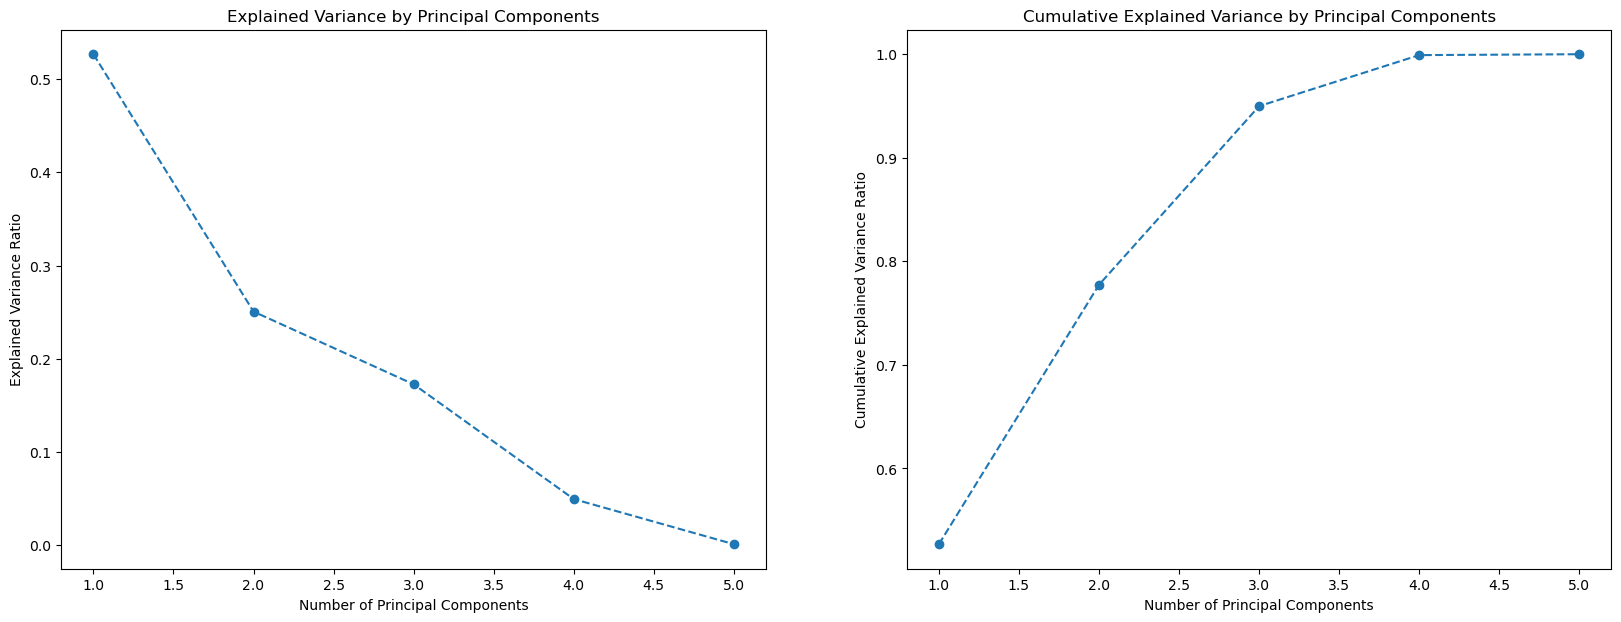

In [95]:
# Plot the explained variance and cumulative explained variance together
fig, ax = plt.subplots(1, 2, figsize=(20, 7))

# Explained variance plot
ax[0].plot(range(1, 6), pca.explained_variance_ratio_, marker='o', linestyle='--')
ax[0].set_title('Explained Variance by Principal Components')
ax[0].set_xlabel('Number of Principal Components')
ax[0].set_ylabel('Explained Variance Ratio')

cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()

# Cumulative explained variance plot
ax[1].plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
ax[1].set_title('Cumulative Explained Variance by Principal Components')
ax[1].set_xlabel('Number of Principal Components')
ax[1].set_ylabel('Cumulative Explained Variance Ratio')

plt.show()

In [96]:
# Print the explained variance of the PCA components
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()

print("Explained variance of the PCA components:", explained_variance)
print("Cumulative explained variance:", cumulative_explained_variance)

Explained variance of the PCA components: [0.52681264 0.25055548 0.17249607 0.04928281 0.00085301]
Cumulative explained variance: [0.52681264 0.77736812 0.94986419 0.99914699 1.        ]


In [97]:
# Perform PCA
pca = PCA(n_components=3)  # You can change the number of components
principal_components = pca.fit_transform(df_clus_scaled)

# Create a DataFrame with the principal components
df_pca = pd.DataFrame(data=principal_components)
df_pca.head()

,0,1,2
0,-0.463335,-0.390353,0.520989
1,0.173097,-0.109033,-0.091353
2,1.409013,-2.045702,-0.054736
3,-0.046005,-0.358473,0.480651
4,3.668968,1.209532,1.663486


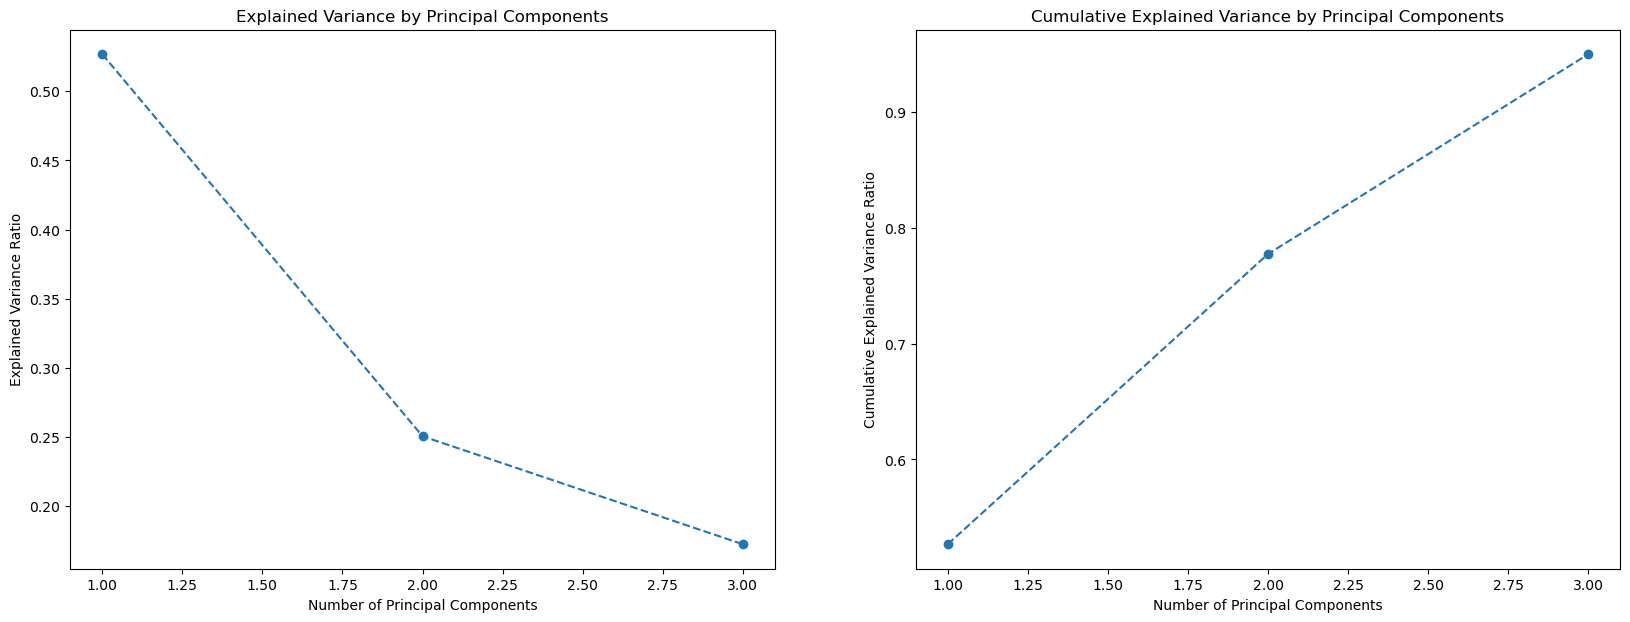

In [98]:
# Plot the explained variance and cumulative explained variance together
fig, ax = plt.subplots(1, 2, figsize=(20, 7))

# Explained variance plot
ax[0].plot(range(1, 4), pca.explained_variance_ratio_, marker='o', linestyle='--')
ax[0].set_title('Explained Variance by Principal Components')
ax[0].set_xlabel('Number of Principal Components')
ax[0].set_ylabel('Explained Variance Ratio')

cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()

# Cumulative explained variance plot
ax[1].plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
ax[1].set_title('Cumulative Explained Variance by Principal Components')
ax[1].set_xlabel('Number of Principal Components')
ax[1].set_ylabel('Cumulative Explained Variance Ratio')

plt.show()

### Projection of the data in PCA space

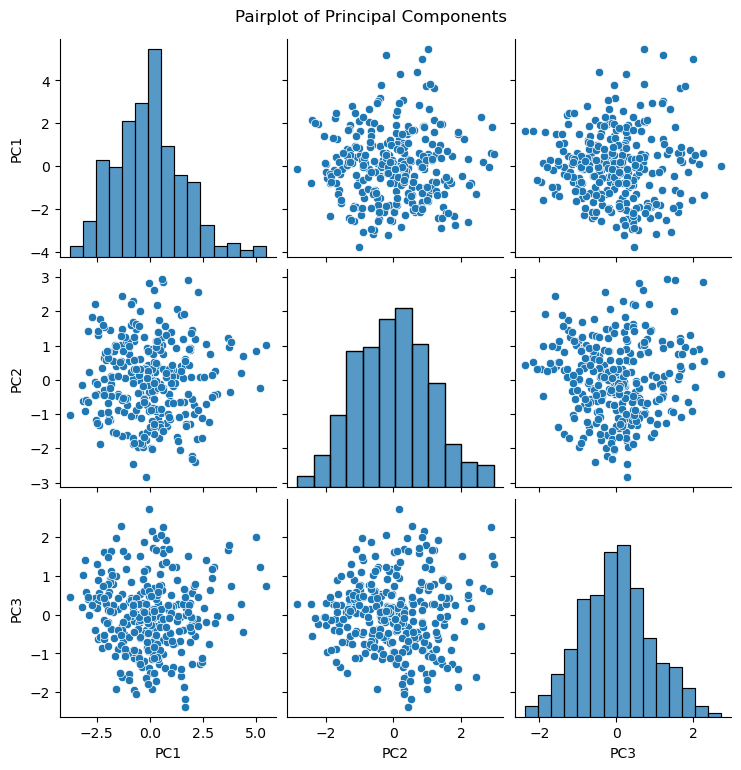

In [83]:
# Create a DataFrame with the principal components for plotting
df_pca_plot = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])

# Plot the pairplot
sns.pairplot(df_pca_plot)
plt.suptitle('Pairplot of Principal Components', y=1.02)
plt.show()

### Using supervised information (i.e. class labels)

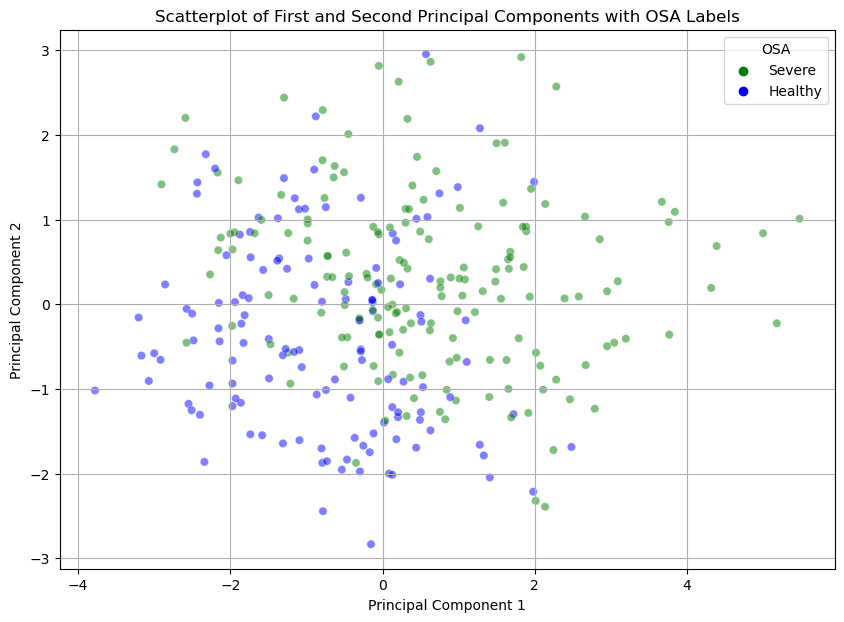

In [84]:
# plt.figure(figsize=(10, 7))
# plt.scatter(df_pca_plot['PC1'], df_pca_plot['PC2'], alpha=0.5)
# plt.title('Scatterplot of First and Second Principal Components')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.grid(True)
# plt.show()

# Add the OSA labels to the df_pca_plot DataFrame
df_pca_plot['OSA'] = df['OSA']

# Plot the scatterplot with labels
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_pca_plot, x='PC1', y='PC2', hue='OSA', palette={'Healthy': 'blue', 'Severe': 'green'}, alpha=0.5)
plt.title('Scatterplot of First and Second Principal Components with OSA Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [85]:
import numpy as np 
def myplot(score,coeff,n_var,features, labels=None):
    # n_var number of variables to show in biplot
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley)
    
    plot_scale = 1.2
    
    for i in range(n_var):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'black',alpha = 1)
        if labels is None:
            plt.text(coeff[i,0]* plot_scale, coeff[i,1] * plot_scale, features[i], color = 'black', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* plot_scale, coeff[i,1] * plot_scale, labels[i], color = 'black', ha = 'center', va = 'center')

    # Add the OSA labels to the scatterplot
    for i in range(len(xs)):
        if df_pca_plot['OSA'].iloc[i] == 'Healthy':
            plt.scatter(xs[i] * scalex, ys[i] * scaley, color='blue', alpha=0.5)
        else:
            plt.scatter(xs[i] * scalex, ys[i] * scaley, color='green', alpha=0.5)

    plt.xlim(-0.8,0.8)
    plt.ylim(-0.8,0.8)
    plt.title('Biplot of First and Second Principal Components with OSA Labels')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    # plt.legend(['Healthy', 'Severe'], loc='upper right')
    plt.grid(True)
    



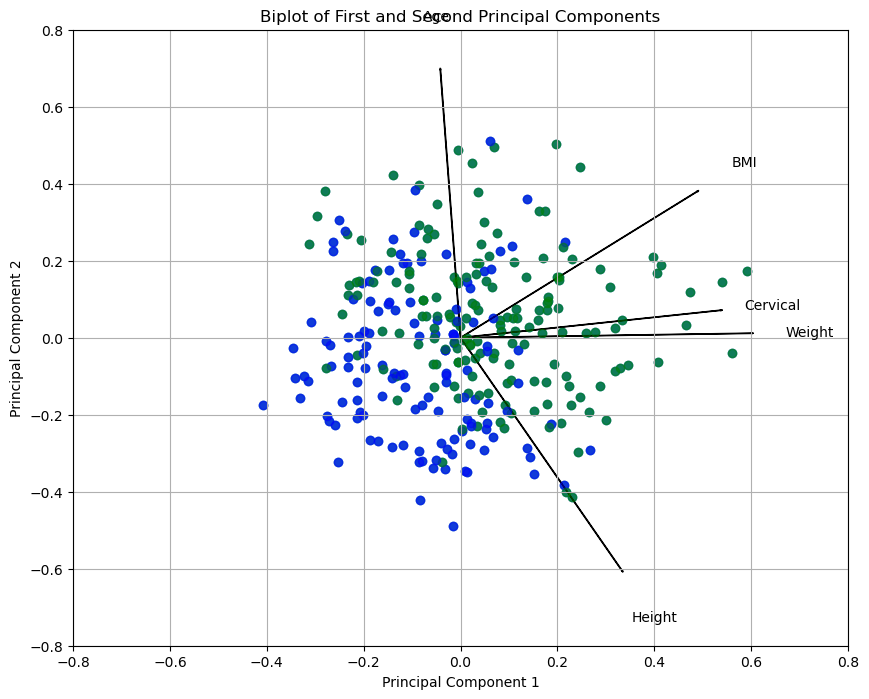

In [86]:
n_var = 5
features = df_clus.columns

# Create a biplot of the first and second principal components
plt.figure(figsize=(10, 8))
myplot(principal_components, np.transpose(pca.components_[0:2, :]), n_var, features, labels=features)
plt.title('Biplot of First and Second Principal Components')
plt.show()


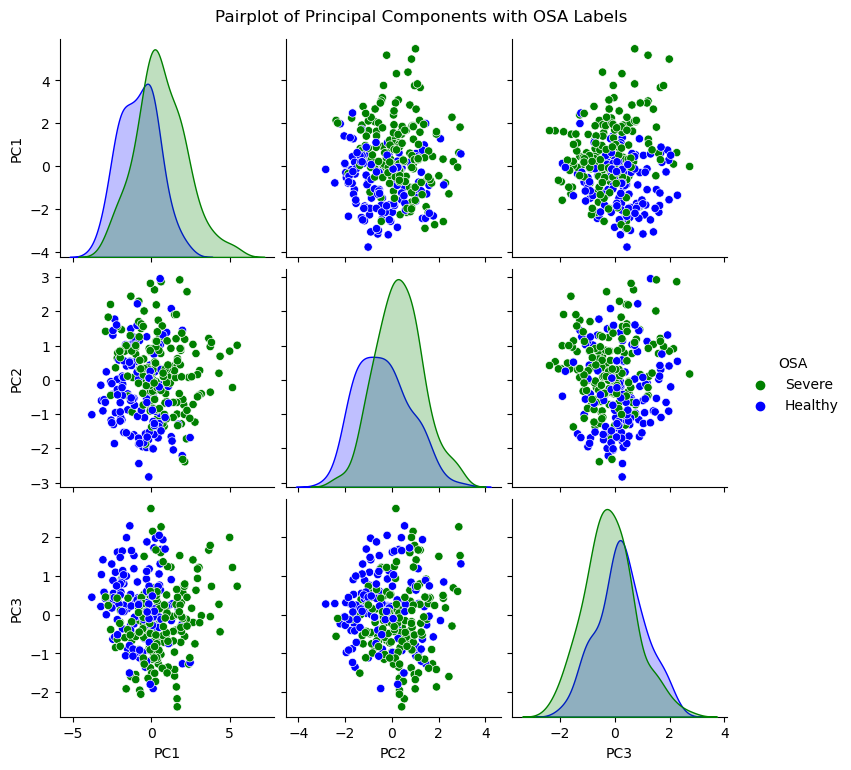

In [63]:
# Create a DataFrame with the principal components for plotting
df_pca_plot = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])

# Add the OSA labels to the df_pca_plot DataFrame
df_pca_plot['OSA'] = df['OSA']

# Plot the pairplot with labels
sns.pairplot(df_pca_plot, hue='OSA', palette={'Healthy': 'blue', 'Severe': 'green'})
plt.suptitle('Pairplot of Principal Components with OSA Labels', y=1.02)
plt.show()

## t-Distributed Stochastic Neighbouring Entities (t-SNE)

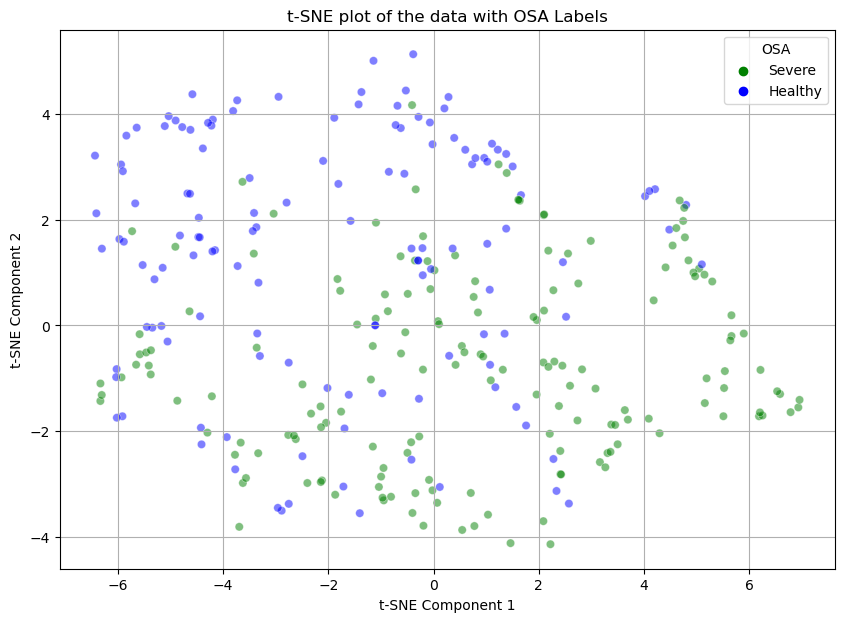

In [64]:
from sklearn.manifold import TSNE

# Perform t-SNE
tsne = TSNE(n_components=3, random_state=42)
tsne_results = tsne.fit_transform(df_clus_scaled)

# Create a DataFrame with the t-SNE results
df_tsne = pd.DataFrame(data=tsne_results, columns=[f'TSNE{i+1}' for i in range(tsne_results.shape[1])])

# Add the OSA labels to the df_tsne DataFrame
df_tsne['OSA'] = df['OSA']

# Plot the t-SNE results for the first two components
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_tsne, x='TSNE1', y='TSNE2', hue='OSA', palette={'Healthy': 'blue', 'Severe': 'green'}, alpha=0.5)
plt.title('t-SNE plot of the data with OSA Labels')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()

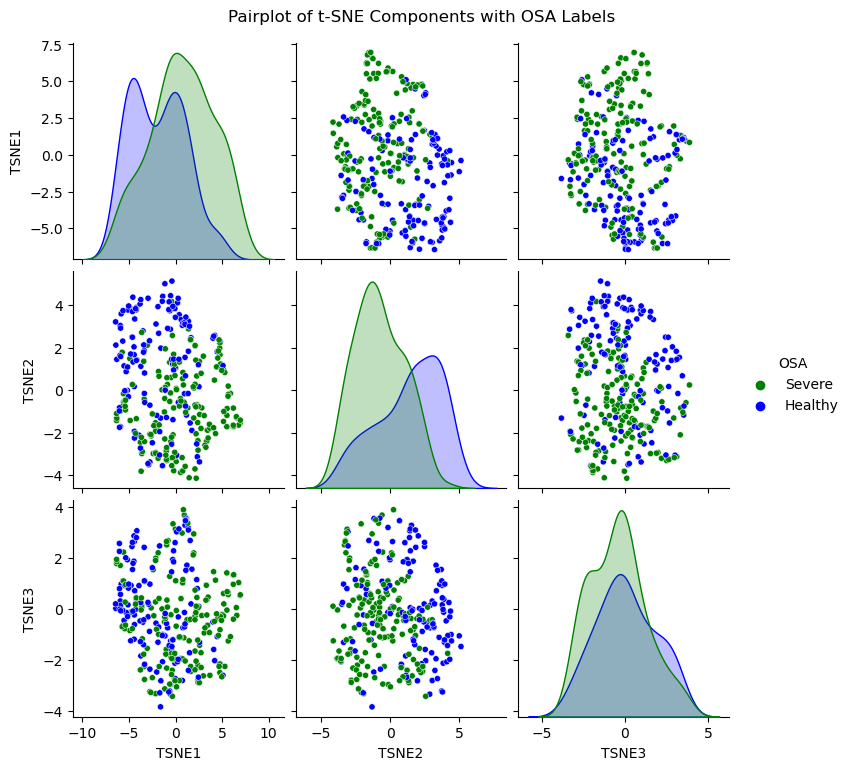

In [65]:
# Plot the pairplot of the t-SNE components with smaller scatter points
sns.pairplot(df_tsne, hue='OSA', palette={'Healthy': 'blue', 'Severe': 'green'}, plot_kws={'s': 20})
plt.suptitle('Pairplot of t-SNE Components with OSA Labels', y=1.02)
plt.show()

## With taking into account gender

In [66]:
df_clus2 = df.drop(columns=['OSA'])

# Standardize the data
scaler = StandardScaler()
df_clus_scaled2 = scaler.fit_transform(df_clus2)

### PCA

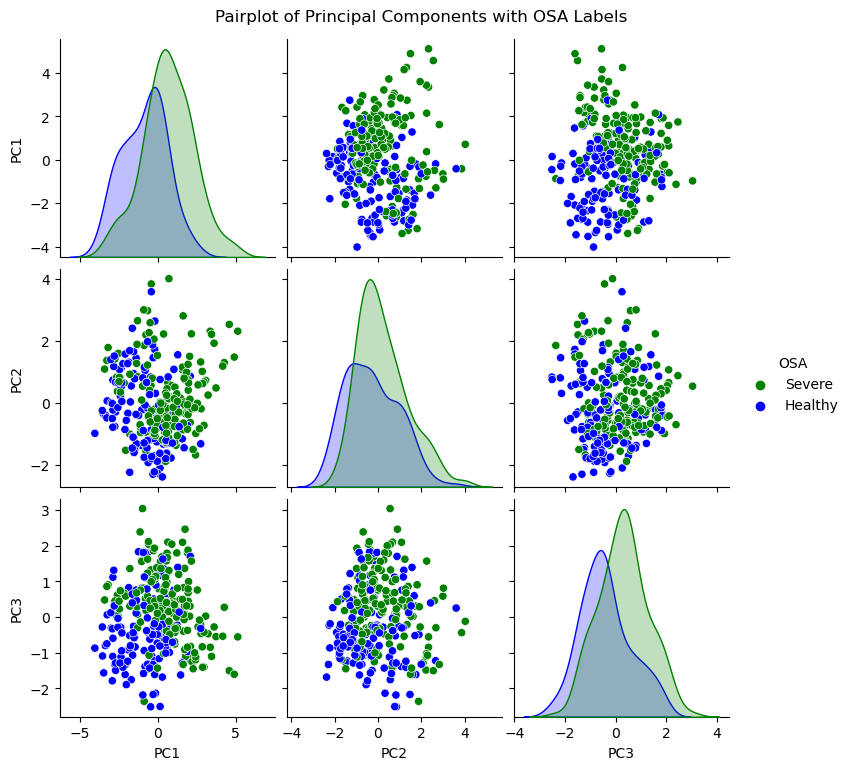

In [67]:
# Perform PCA with 3 components
pca = PCA(n_components=3)
principal_components = pca.fit_transform(df_clus_scaled2)

# Create a DataFrame with the principal components
df_pca = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])

# Add the OSA labels to the df_pca DataFrame
df_pca['OSA'] = df['OSA']

# Plot the pairplot
sns.pairplot(df_pca, hue='OSA', palette={'Healthy': 'blue', 'Severe': 'green'})
plt.suptitle('Pairplot of Principal Components with OSA Labels', y=1.02)
plt.show()

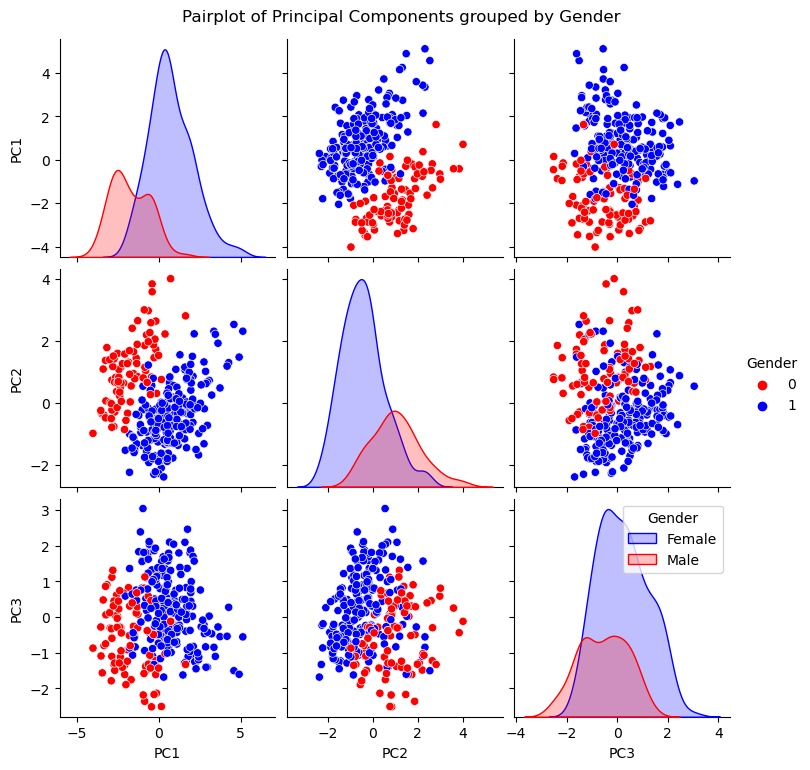

In [68]:
# Add the Gender labels to the df_pca DataFrame
df_pca['Gender'] = df['Gender']

# Plot the pairplot grouped by Gender
sns.pairplot(df_pca, hue='Gender', palette={0: 'red', 1: 'blue'})
plt.suptitle('Pairplot of Principal Components grouped by Gender', y=1.02)
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.show()

### t-SNE

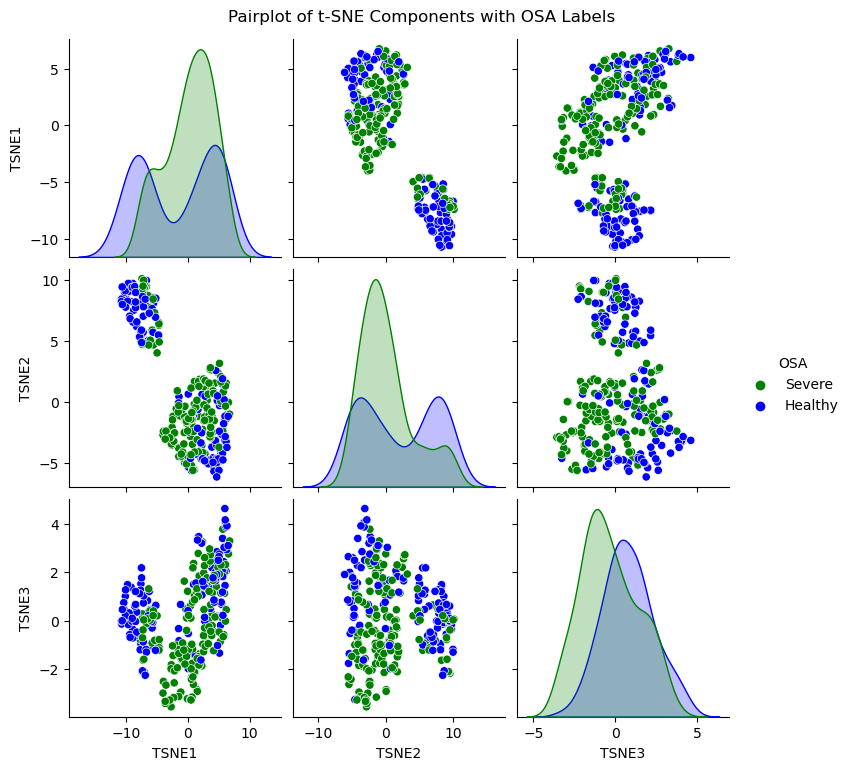

In [69]:
from sklearn.manifold import TSNE

# Perform t-SNE
tsne = TSNE(n_components=3, random_state=42)
tsne_results = tsne.fit_transform(df_clus_scaled2)

# Create a DataFrame with the t-SNE results
df_tsne = pd.DataFrame(data=tsne_results, columns=[f'TSNE{i+1}' for i in range(tsne_results.shape[1])])

# Add the OSA labels to the df_tsne DataFrame
df_tsne['OSA'] = df['OSA']

# Plot the pairplot
sns.pairplot(df_tsne, hue='OSA', palette={'Healthy': 'blue', 'Severe': 'green'})
plt.suptitle('Pairplot of t-SNE Components with OSA Labels', y=1.02)
plt.show()

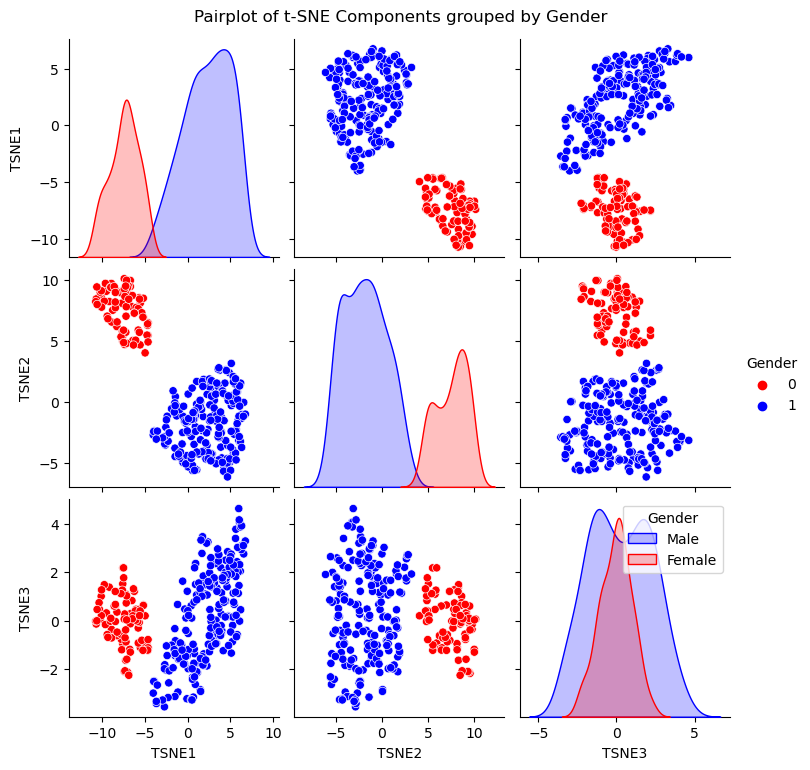

In [70]:
# Add the Gender labels to the df_tsne DataFrame
df_tsne['Gender'] = df['Gender']

# Plot the pairplot grouped by Gender
sns.pairplot(df_tsne, hue='Gender', palette={0: 'red', 1: 'blue'})
plt.suptitle('Pairplot of t-SNE Components grouped by Gender', y=1.02)
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()